# Artificial Intelligence Nanodegree

## Convolutional Neural Networks

---

In this notebook, we train a CNN to classify images from the CIFAR-10 database.

### 1. Load CIFAR-10 Database

In [1]:
import keras
from keras.datasets import cifar10

# load the pre-shuffled train and test data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

Using TensorFlow backend.


### 2. Visualize the First 24 Training Images

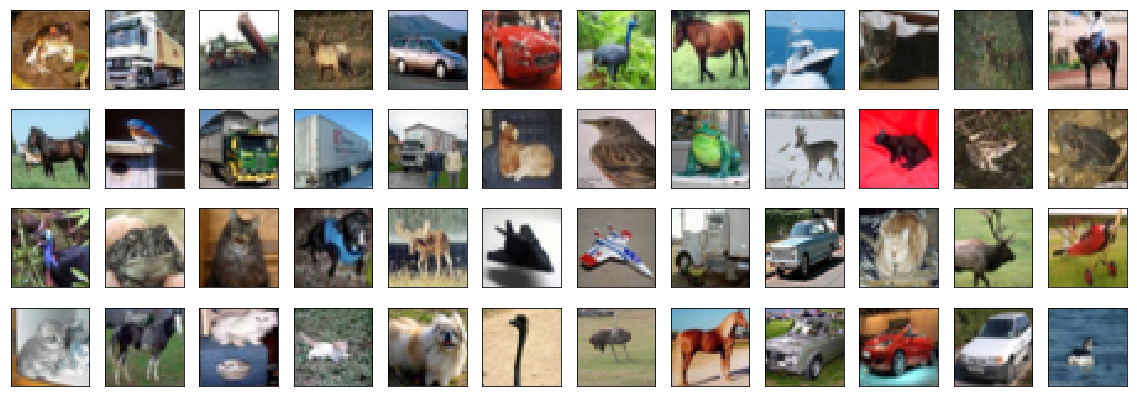

In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(figsize=(20,7))
for i in range(48):
    ax = fig.add_subplot(4, 12, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_train[i]))

### 3. Rescale the Images by Dividing Every Pixel in Every Image by 255

In [5]:
# rescale [0,255] --> [0,1]
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

### 4.  Break Dataset into Training, Testing, and Validation Sets

In [6]:
from keras.utils import np_utils

# one-hot encode the labels
num_classes = len(np.unique(y_train))
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

# break training set into training and validation sets
(x_train, x_valid) = x_train[5000:], x_train[:5000]
(y_train, y_valid) = y_train[5000:], y_train[:5000]

# print shape of training set
print('x_train shape:', x_train.shape)

# print number of training, validation, and test images
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
print(x_valid.shape[0], 'validation samples')

x_train shape: (45000, 32, 32, 3)
45000 train samples
10000 test samples
5000 validation samples


### 5. Define the Model Architecture 

In [7]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential()
model.add(Conv2D(filters=16, kernel_size=2, padding='same', activation='relu', 
                        input_shape=(32, 32, 3)))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=64, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(500, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(10, activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 16)        208       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 32)        2080      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 64)          8256      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 4, 4, 64)          0         
__________

This model showed signs of overfitting, validation accuracy was dropping and loss increasing. For example: 
    Epoch 00050: val_loss did not improve
11s - loss: 1.6082 - acc: 0.4535 - val_loss: 1.6787 - val_acc: 0.3884
Epoch 52/100
Epoch 00051: val_loss did not improve
11s - loss: 1.6240 - acc: 0.4519 - val_loss: 1.3067 - val_acc: 0.5470
Epoch 53/100
Epoch 00052: val_loss did not improve
11s - loss: 1.6207 - acc: 0.4484 - val_loss: 1.7208 - val_acc: 0.3540
Epoch 54/100
Epoch 00053: val_loss did not improve
11s - loss: 1.6428 - acc: 0.4450 - val_loss: 1.4151 - val_acc: 0.5172
Epoch 55/100
Epoch 00054: val_loss did not improve
11s - loss: 1.6528 - acc: 0.4401 - val_loss: 1.8029 - val_acc: 0.3904
Epoch 56/100
Epoch 00055: val_loss did not improve
11s - loss: 1.6500 - acc: 0.4362 - val_loss: 1.7178 - val_acc: 0.4786
Epoch 57/100
Epoch 00056: val_loss did not improve
11s - loss: 1.6631 - acc: 0.4290 - val_loss: 1.7265 - val_acc: 0.4444
Epoch 58/100
Epoch 00057: val_loss did not improve
11s - loss: 1.6837 - acc: 0.4290 - val_loss: 1.5614 - val_acc: 0.4382
Epoch 59/100

### 5.1 Let's try the inspiration example from Udacity:

In [17]:
'''Train a simple deep CNN on the CIFAR10 small images dataset.
It gets to 75% validation accuracy in 25 epochs, and 79% after 50 epochs.
(it's still underfitting at that point, though).
'''

#from __future__ import print_function
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
import os

batch_size = 32
num_classes = 10
epochs = 30
data_augmentation = False
num_predictions = 20
save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 'keras_cifar10_trained_model.h5'

# The data, split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# Convert class vectors to binary class matrices.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

# initiate RMSprop optimizer
opt = keras.optimizers.rmsprop(lr=0.0001, decay=1e-6)

# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

if not data_augmentation:
    print('Not using data augmentation.')
    model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True)
else:
    print('Using real-time data augmentation.')
    # This will do preprocessing and realtime data augmentation:
    datagen = ImageDataGenerator(
        featurewise_center=False, # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        zca_epsilon=1e-06,  # epsilon for ZCA whitening
        rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        shear_range=0.,  # set range for random shear
        zoom_range=0.,  # set range for random zoom
        channel_shift_range=0.,  # set range for random channel shifts
        fill_mode='nearest',  # set mode for filling points outside the input boundaries
        cval=0.,  # value used for fill_mode = "constant"
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False,  # randomly flip images
        rescale=None,  # set rescaling factor (applied before any other transformation)
        preprocessing_function=None,  # set function that will be applied on each input
        data_format=None,  # image data format, either "channels_first" or "channels_last"
        validation_split=0.0)  # fraction of images reserved for validation (strictly between 0 and 1)

    # Compute quantities required for feature-wise normalization
    # (std, mean, and principal components if ZCA whitening is applied).
    datagen.fit(x_train)

    # Fit the model on the batches generated by datagen.flow().
    model.fit_generator(datagen.flow(x_train, y_train,
                                     batch_size=batch_size),
                        epochs=epochs,
                        validation_data=(x_test, y_test),
                        workers=4)

# Save model and weights
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)

# Score trained model.
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples
Not using data augmentation.
Train on 50000 samples, validate on 10000 samples
Epoch 1/30
50000/50000 [==============================] - 22s - loss: 1.7998 - acc: 0.3429 - val_loss: 1.5315 - val_acc: 0.4493
Epoch 2/30
50000/50000 [==============================] - 22s - loss: 1.4814 - acc: 0.4621 - val_loss: 1.3394 - val_acc: 0.5226
Epoch 3/30
50000/50000 [==============================] - 21s - loss: 1.3490 - acc: 0.5173 - val_loss: 1.2695 - val_acc: 0.5591
Epoch 4/30
50000/50000 [==============================] - 21s - loss: 1.2481 - acc: 0.5567 - val_loss: 1.1387 - val_acc: 0.5987
Epoch 5/30
50000/50000 [==============================] - 22s - loss: 1.1680 - acc: 0.5880 - val_loss: 1.0596 - val_acc: 0.6272
Epoch 6/30
50000/50000 [==============================] - 22s - loss: 1.0985 - acc: 0.6145 - val_loss: 1.0563 - val_acc: 0.6299
Epoch 7/30
50000/50000 [==============================] - 21s - loss: 1.0473 - a

### 6. Compile the Model 

In [18]:
# compile the model
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', 
                  metrics=['accuracy'])

### 7. Train the Model 

In [25]:
from keras.callbacks import ModelCheckpoint   

# train the model
checkpointer = ModelCheckpoint(filepath='model.weights.best.hdf5', verbose=1, 
                               save_best_only=True)
hist = model.fit(x_train, y_train, batch_size=32, epochs=30,
          validation_data=(x_valid, y_valid), callbacks=[checkpointer], 
          verbose=2, shuffle=True)

Train on 50000 samples, validate on 5000 samples
Epoch 1/30
Epoch 00000: val_loss improved from inf to 1.13197, saving model to model.weights.best.hdf5
20s - loss: 1.1801 - acc: 0.6197 - val_loss: 1.1320 - val_acc: 0.6330
Epoch 2/30
Epoch 00001: val_loss improved from 1.13197 to 1.03740, saving model to model.weights.best.hdf5
20s - loss: 1.2127 - acc: 0.6133 - val_loss: 1.0374 - val_acc: 0.6758
Epoch 3/30
Epoch 00002: val_loss did not improve
20s - loss: 1.2461 - acc: 0.6046 - val_loss: 1.0632 - val_acc: 0.6386
Epoch 4/30
Epoch 00003: val_loss improved from 1.03740 to 1.03522, saving model to model.weights.best.hdf5
20s - loss: 1.2955 - acc: 0.5907 - val_loss: 1.0352 - val_acc: 0.6928
Epoch 5/30
Epoch 00004: val_loss did not improve
20s - loss: 1.3357 - acc: 0.5772 - val_loss: 1.0953 - val_acc: 0.6408
Epoch 6/30
Epoch 00005: val_loss did not improve
20s - loss: 1.3939 - acc: 0.5552 - val_loss: 1.3286 - val_acc: 0.5678
Epoch 7/30
Epoch 00006: val_loss did not improve
20s - loss: 1.4426

### 8. Load the Model with the Best Validation Accuracy

In [26]:
# load the weights that yielded the best validation accuracy
model.load_weights('model.weights.best.hdf5')

### 9. Calculate Classification Accuracy on Test Set

In [27]:
# evaluate and print test accuracy
score = model.evaluate(x_test, y_test, verbose=0)
print('\n', 'Test accuracy:', score[1])


 Test accuracy: 0.6689


### 10. Visualize Some Predictions

This may give you some insight into why the network is misclassifying certain objects.

In [28]:
# get predictions on the test set
y_hat = model.predict(x_test)

# define text labels (source: https://www.cs.toronto.edu/~kriz/cifar.html)
cifar10_labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

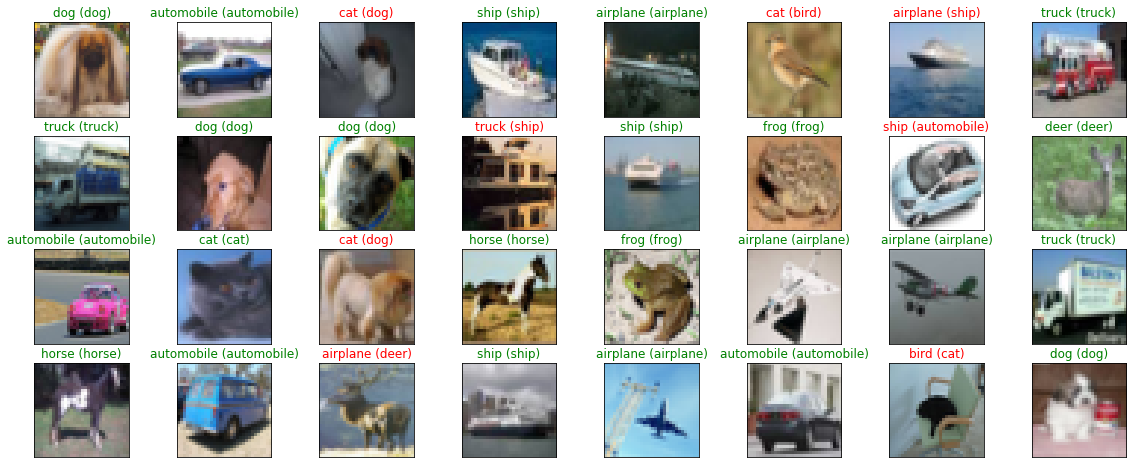

In [29]:
# plot a random sample of test images, their predicted labels, and ground truth
fig = plt.figure(figsize=(20, 8))
for i, idx in enumerate(np.random.choice(x_test.shape[0], size=32, replace=False)):
    ax = fig.add_subplot(4, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_test[idx]))
    pred_idx = np.argmax(y_hat[idx])
    true_idx = np.argmax(y_test[idx])
    ax.set_title("{} ({})".format(cifar10_labels[pred_idx], cifar10_labels[true_idx]),
                 color=("green" if pred_idx == true_idx else "red"))